In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from utils import *

In [2]:
data_dir = "../Data_Cropped_and_Resized"

### Feature Extraction

In [4]:
train_path = f"{data_dir}/train"

train_imgs, train_sobel_edges, train_labels = extract_features(train_path, detect_edges_sobel)
_, train_threshold_edges, _ = extract_features(train_path, threshold_image)
_, train_canny_edges, _ = extract_features(train_path, detect_canny_edges)
_, train_soft_tissue, _ = extract_features(train_path, get_soft_tissue)

_, train_resnet_feat, _ = extract_features(train_path, get_resnet_features, {"model": resnet101})
_, train_transformer_feat, _ = extract_features(train_path, transformer_feature_vector, {"model": model, "extractor": extractor})

In [5]:
valid_path = f"{data_dir}/valid"

valid_imgs, valid_sobel_edges, valid_labels = extract_features(valid_path, detect_edges_sobel)
_, valid_hounsfield_edges, _ = extract_features(valid_path, apply_hounsfield_units)
_, valid_threshold_edges, _ = extract_features(valid_path, threshold_image)

In [7]:
training_features = [[img.flatten() for img in train_sobel_edges],
            [img.flatten() for img in train_hounsfield_edges],
            [img.flatten() for img in train_threshold_edges]]

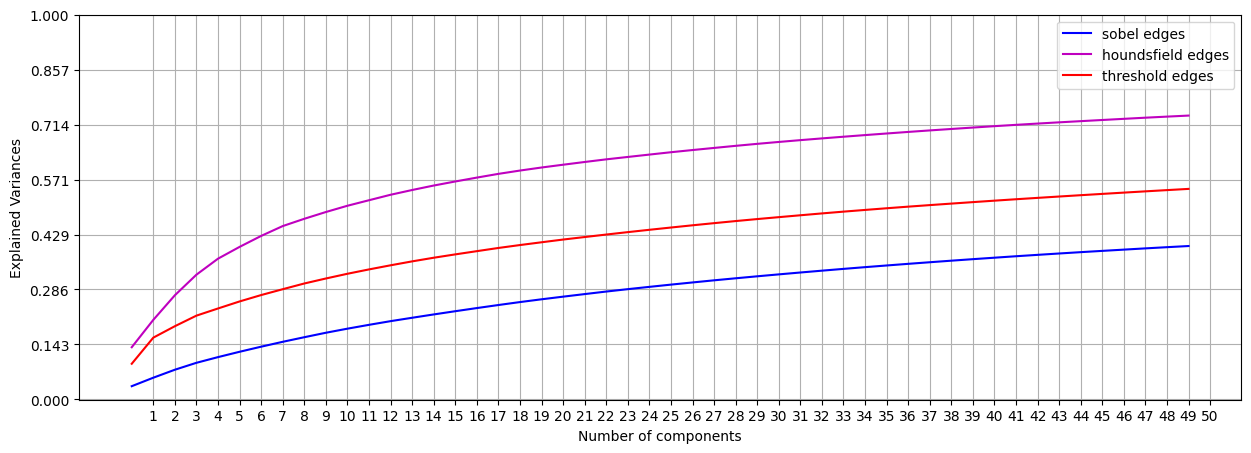

In [8]:
labels = ['sobel edges', 'houndsfield edges', 'threshold edges']

x = plot_PCA(training_features, labels, n_components=50)

In [42]:
# dimensionality reduction

### individual edge features
train_input_features = np.array([[img.flatten() for img in train_sobel_edges],
                            [img.flatten() for img in train_hounsfield_edges],
                            [img.flatten() for img in train_threshold_edges]])

X_train_sobel_pca, X_train_hounsfield_pca, X_train_thresh_pca = get_PCA(train_input_features, n_components=2)[-1]
X_train_sobel_tsne, X_train_hounsfield_tsne, X_train_thresh_tsne = get_tsne(train_input_features, n_components=2)

val_input_features = np.array([[img.flatten() for img in valid_sobel_edges],
                            [img.flatten() for img in valid_hounsfield_edges],
                            [img.flatten() for img in valid_threshold_edges]])
X_val_sobel_pca, X_val_hounsfield_pca, X_val_thresh_pca = get_PCA(val_input_features, n_components=2)[-1]
X_val_sobel_tsne, X_val_hounsfield_tsne, X_val_thresh_tsne = get_tsne(val_input_features, n_components=2)

### combined features
combined_train_features = np.array([[np.array([x, y, z]).flatten() for x, y, z in zip(train_sobel_edges, train_hounsfield_edges, train_threshold_edges)]])
X_train_combined_pca = get_PCA(combined_train_features, n_components=2)[-1][0]
X_train_combined_tsne = get_tsne(combined_train_features, n_components=2)[0]

combined_val_features = np.array([[np.array([x, y, z]).flatten() for x, y, z in zip(valid_sobel_edges, valid_hounsfield_edges, valid_threshold_edges)]])
X_val_combined_pca = get_PCA(combined_val_features, n_components=2)[-1][0]
X_val_combined_tsne = get_tsne(combined_val_features, n_components=2)[0]

In [30]:
def plot_classes(X, y, ax, title):

  # color code each cluster (person ID)
  colormap = plt.cm.tab20
  colorst = [colormap(i) for i in np.linspace(0, 1.0, len(np.unique(y)))]

  # project the features into 2 dimensions
  for k in np.unique(y):
    ax.scatter(X[y==k, 0], X[y==k, 1], alpha=0.5, facecolors=colorst[k])

  ax.set_title(title)

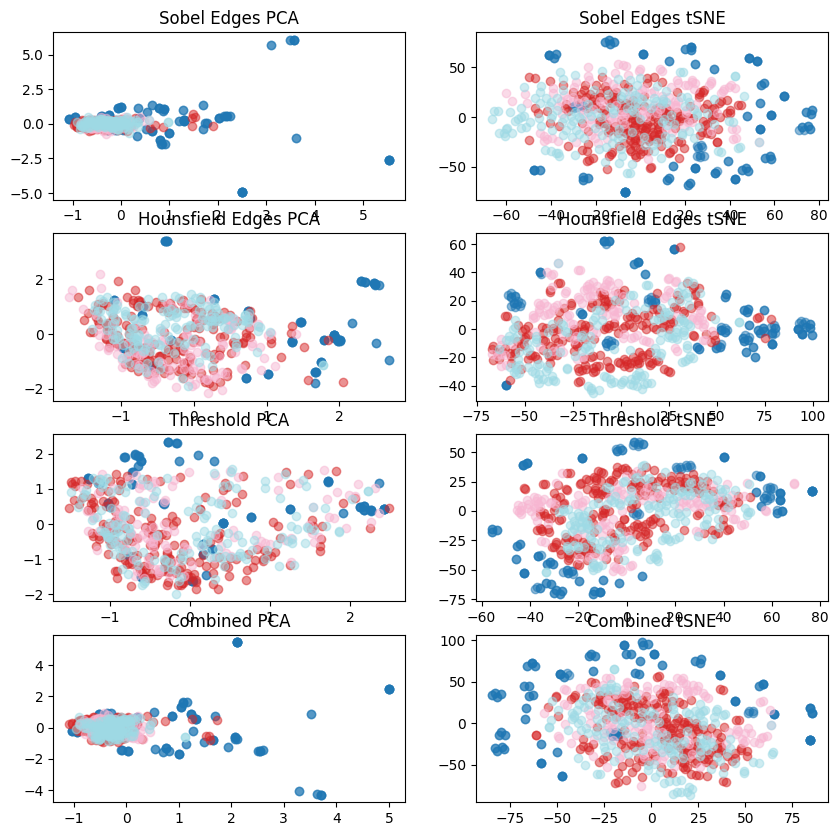

In [34]:
# plot results
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,10))

# y is the class labels
plot_classes(X_train_sobel_pca, train_labels, ax[0,0], title='Sobel Edges PCA')
plot_classes(X_train_sobel_tsne, train_labels, ax[0,1], title='Sobel Edges tSNE')

plot_classes(X_train_hounsfield_pca, train_labels, ax[1,0], title='Hounsfield Edges PCA')
plot_classes(X_train_hounsfield_tsne, train_labels, ax[1,1], title='Hounsfield Edges tSNE')

plot_classes(X_train_thresh_pca, train_labels, ax[2,0], title='Threshold PCA')
plot_classes(X_train_thresh_tsne, train_labels, ax[2,1], title='Threshold tSNE')

plot_classes(X_train_combined_pca, train_labels, ax[3,0], title='Combined PCA')
plot_classes(X_train_combined_tsne, train_labels, ax[3,1], title='Combined tSNE')

plt.show()

### SVM

##### Linear SVM

In [39]:
linear_svm(X_train_combined_pca, train_labels)

#### Nonlinear SVM

#### Combined

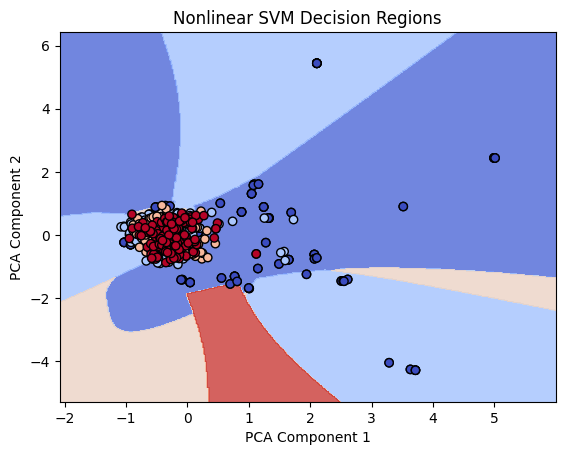

Accuracy: 0.3194444444444444


In [35]:
nonlinear_svm(X_train_combined_pca, train_labels, X_val_combined_pca, valid_labels)

#### Sobel

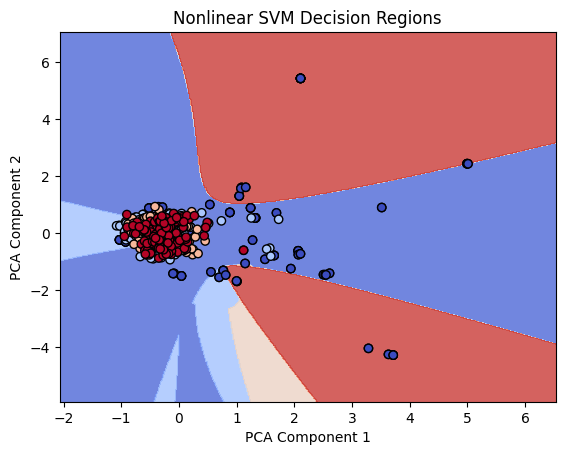

Accuracy: 0.2638888888888889


In [36]:
nonlinear_svm(X_train_sobel_pca, train_labels, X_val_sobel_pca, valid_labels)

#### Hounsfield

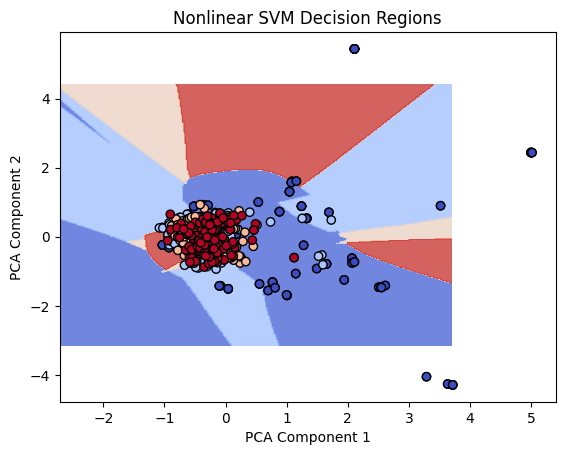

Accuracy: 0.19444444444444445


In [37]:
nonlinear_svm(X_train_hounsfield_pca, train_labels, X_val_hounsfield_pca, valid_labels)

In [ ]:
nonlinear_svm(X_train_hounsfield_tsne, train_labels, X_val_hounsfield_tsne, valid_labels)

#### Threshold

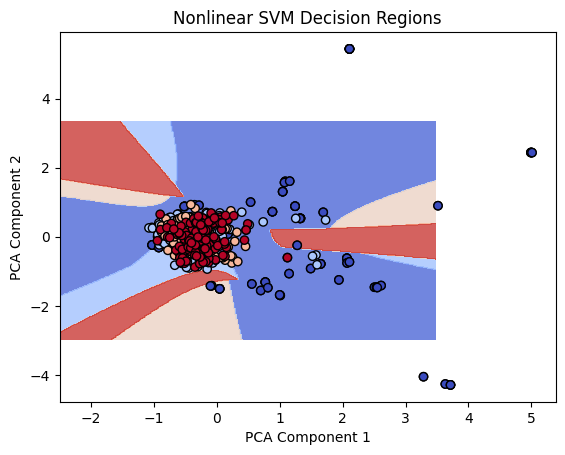

Accuracy: 0.18055555555555555


In [43]:
nonlinear_svm(X_train_thresh_pca, train_labels, X_val_thresh_pca, valid_labels)

In [ ]:
nonlinear_svm(X_train_thresh_tsne, train_labels, X_val_thresh_tsne, valid_labels)